# Stock Market Portfolio Optimization with Python

Stock market portfolio optimization involves strategically selecting a mix of stocks to achieve the highest possible returns while minimizing risk, using historical performance data and key financial metrics.

The process begins by importing essential Python libraries and retrieving stock market data through the yfinance API.

In [1]:
# pip install yfinance

In [2]:
import pandas as pd
import yfinance as yf
from datetime import date, timedelta

In [3]:
#defining the time period of the data

end_date = date.today().strftime('%Y-%m-%d')
start_date = (date.today()-timedelta(days=365)).strftime('%Y-%m-%d')

In [16]:
#tickers to download for the stocks

tickers = ['AMZN', 'META', 'MSFT', 'TSLA', 'AAPL', 'GOOGL']

data = yf.download(tickers, start = start_date, end= end_date, progress =False)


In [17]:
data = data.reset_index() #bring the date into columns

In [18]:
data_melted = data.melt(id_vars=['Date'], var_name=['Attribute','Ticker'])
data_pivoted = data_melted.pivot_table(index=['Date','Ticker'],columns='Attribute', values='value', aggfunc='first')

In [19]:
stock_data = data_pivoted.reset_index()
print(stock_data.head())

Attribute       Date Ticker       Close        High         Low        Open  \
0         2024-02-20   AAPL  180.706726  181.572633  179.154060  180.935641   
1         2024-02-20   AMZN  167.080002  168.710007  165.740005  167.830002   
2         2024-02-20  GOOGL  140.610275  141.566814  138.986173  139.155557   
3         2024-02-20   META  469.954803  474.367938  464.784551  467.932530   
4         2024-02-20   MSFT  400.539703  402.230188  395.786409  400.987171   

Attribute      Volume  
0          53665600.0  
1          41980300.0  
2          25144700.0  
3          18015500.0  
4          24307900.0  


# Companies Stock Market Performance Over Time

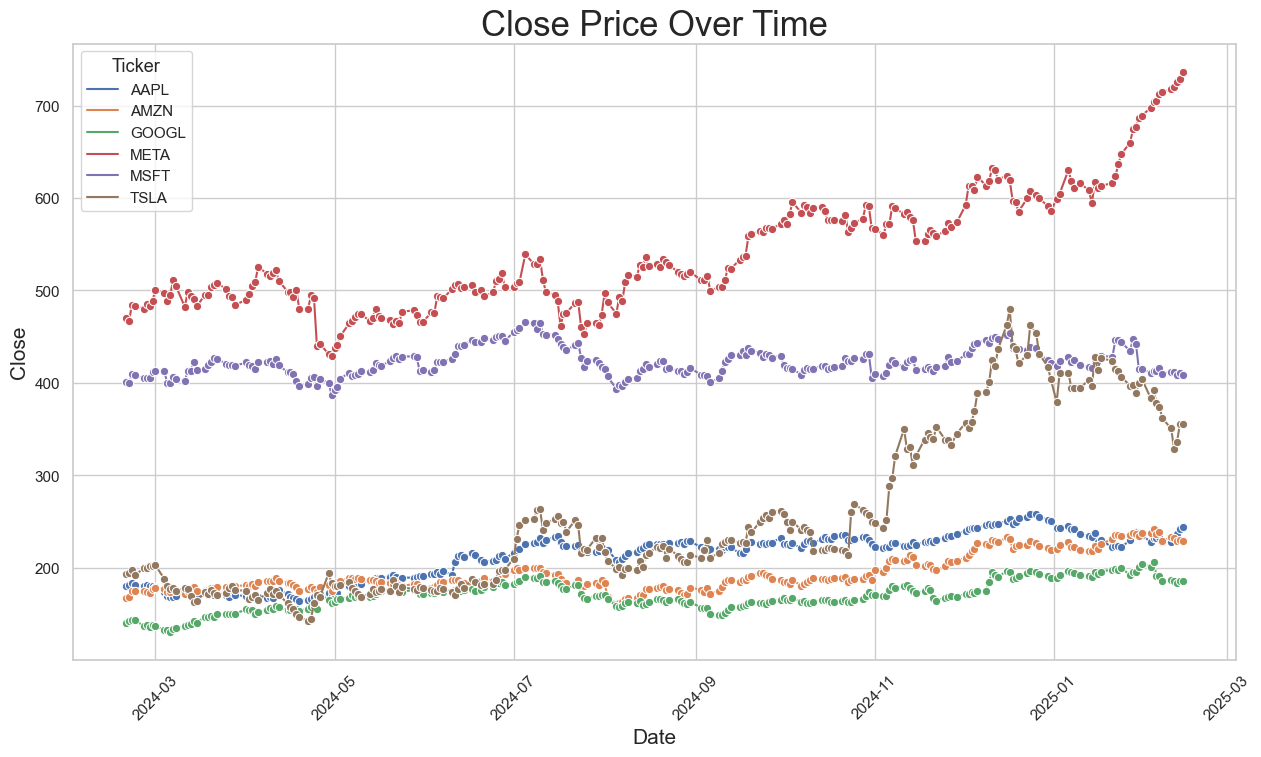

In [20]:
import matplotlib.pyplot as plt

import seaborn as sns

stock_data['Date']=pd.to_datetime(stock_data['Date'])

stock_data.set_index('Date',inplace=True)
stock_data.reset_index(inplace=True)

plt.figure(figsize=(15,8))

sns.set(style= 'whitegrid')

sns.lineplot(data = stock_data, x='Date',y="Close", hue='Ticker', marker='o')

plt.xlabel('Date',fontsize=15)
plt.ylabel('Close',fontsize=15)
plt.title('Close Price Over Time',fontsize=25)
plt.legend(title='Ticker', title_fontsize='13', fontsize='11')
plt.grid(True)

plt.xticks(rotation=45)

plt.show()

The graph displays the adjusted close prices of six stocks over time from February 2023 to February 2024. It highlights that META has the highest adjusted close prices, followed by MICROSOFT, and TESLA. The prices for META showS noticeable upward trends, which indicates strong performance, while APPLE, AMAZON and GOOGLE exhibit more stability with relatively lower price fluctuations.

# Compute the 50 days and 200 days moving average for each stock

In [9]:
short_window = 50
long_window = 200

In [10]:
stock_data.set_index('Date',inplace=True)
unique_ticker = stock_data['Ticker'].unique()

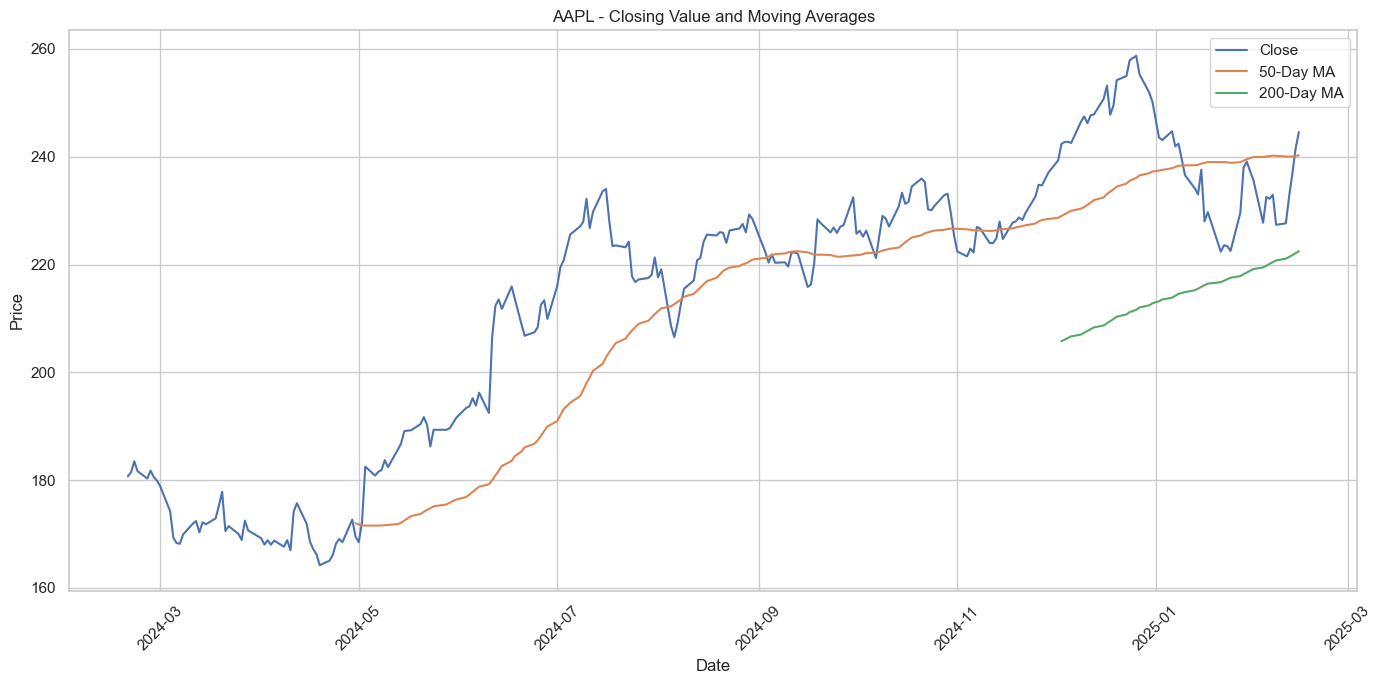

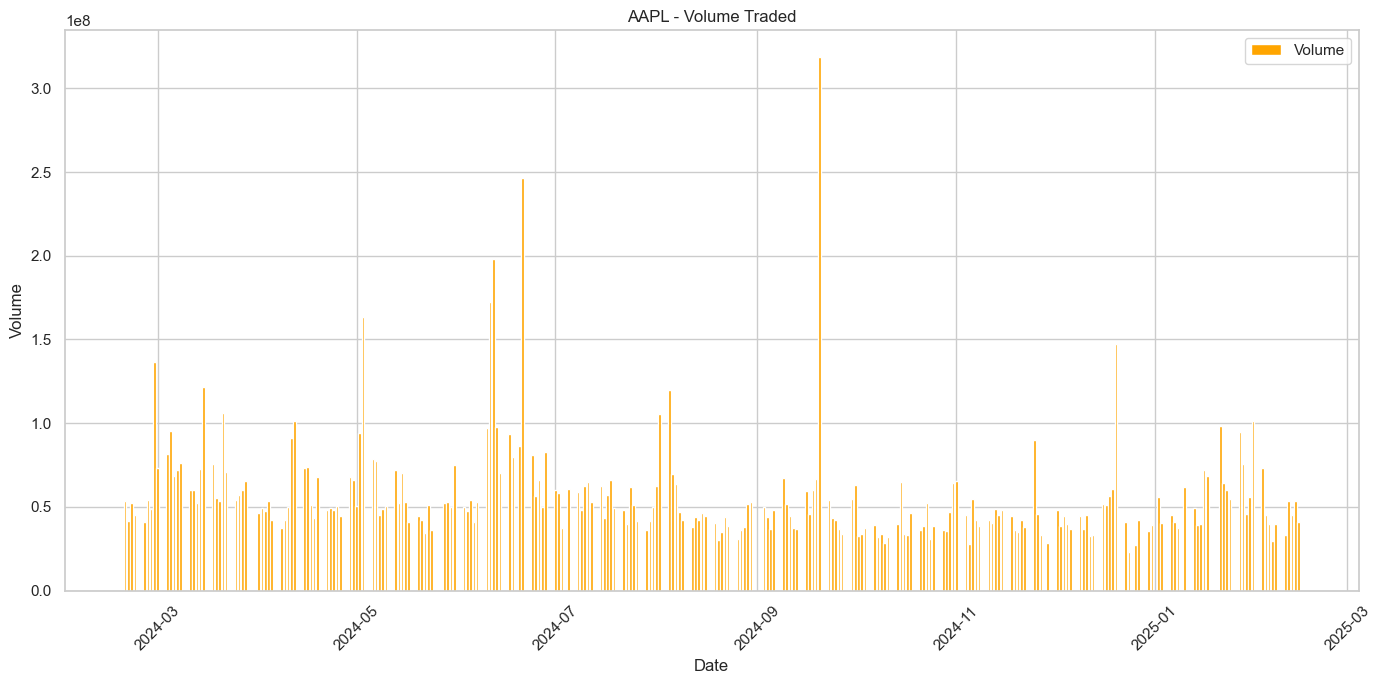

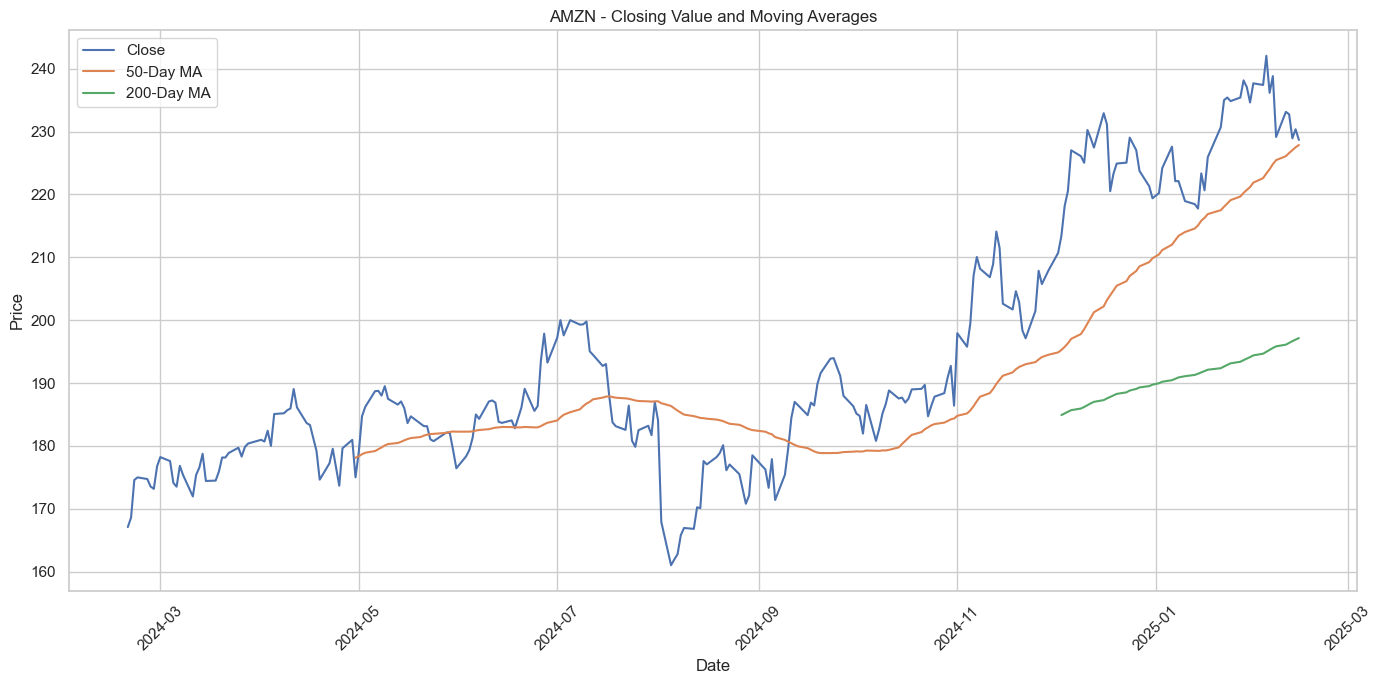

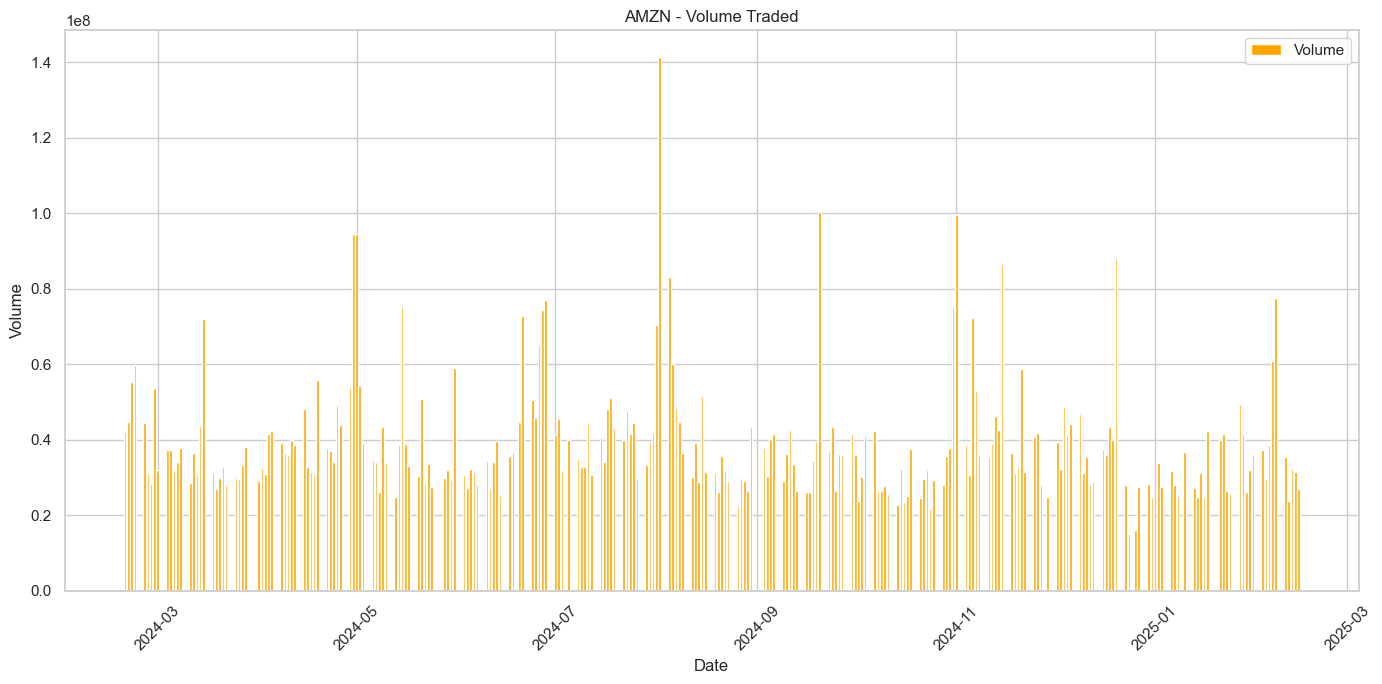

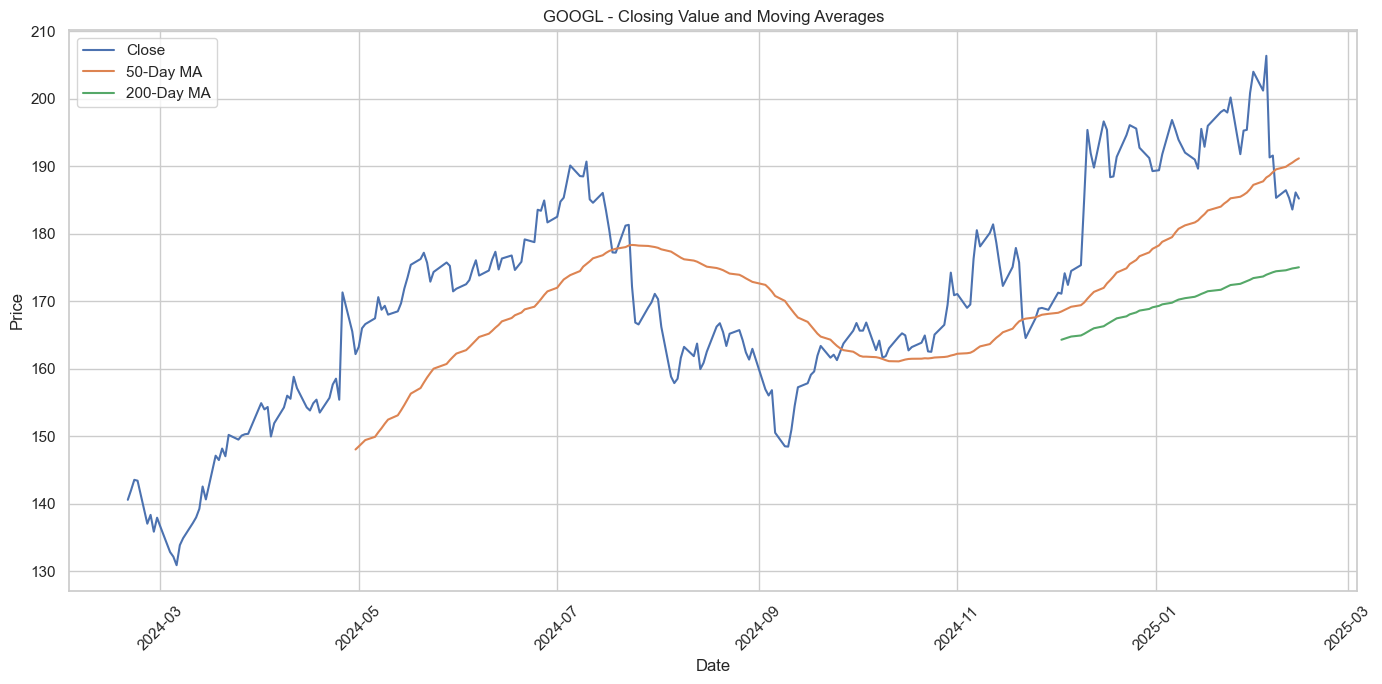

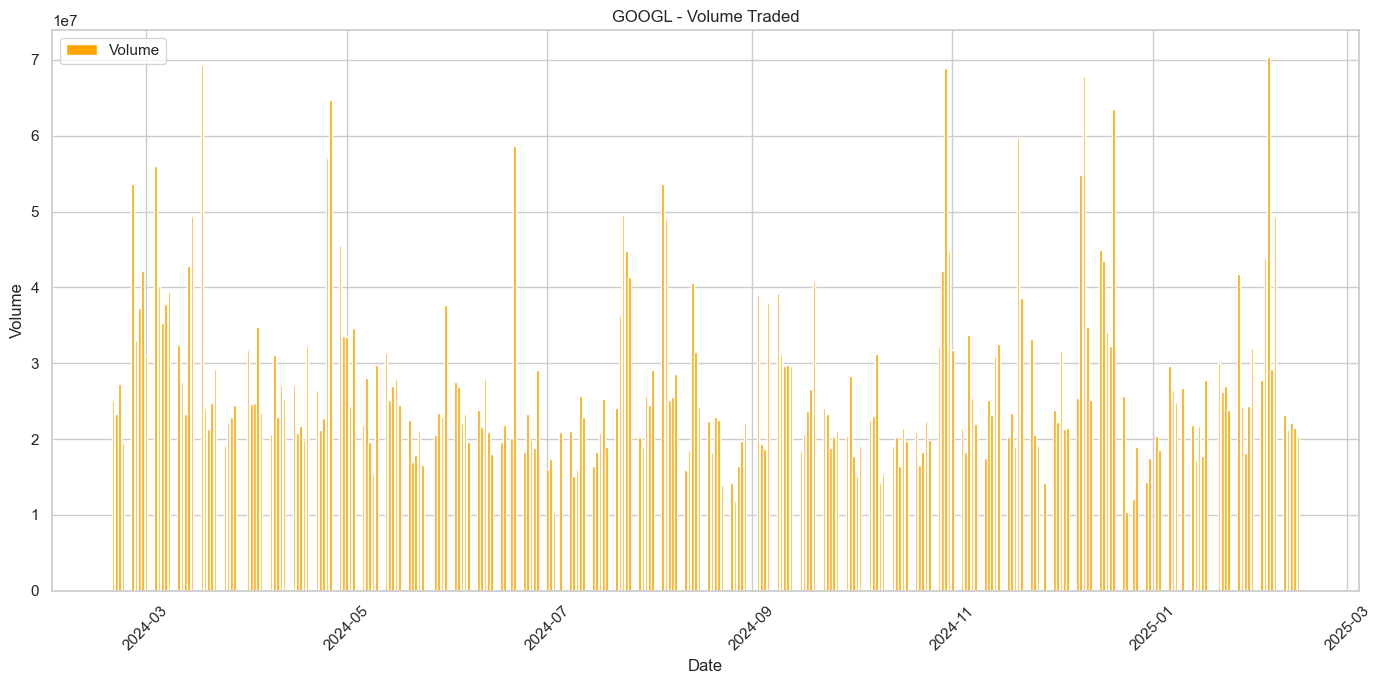

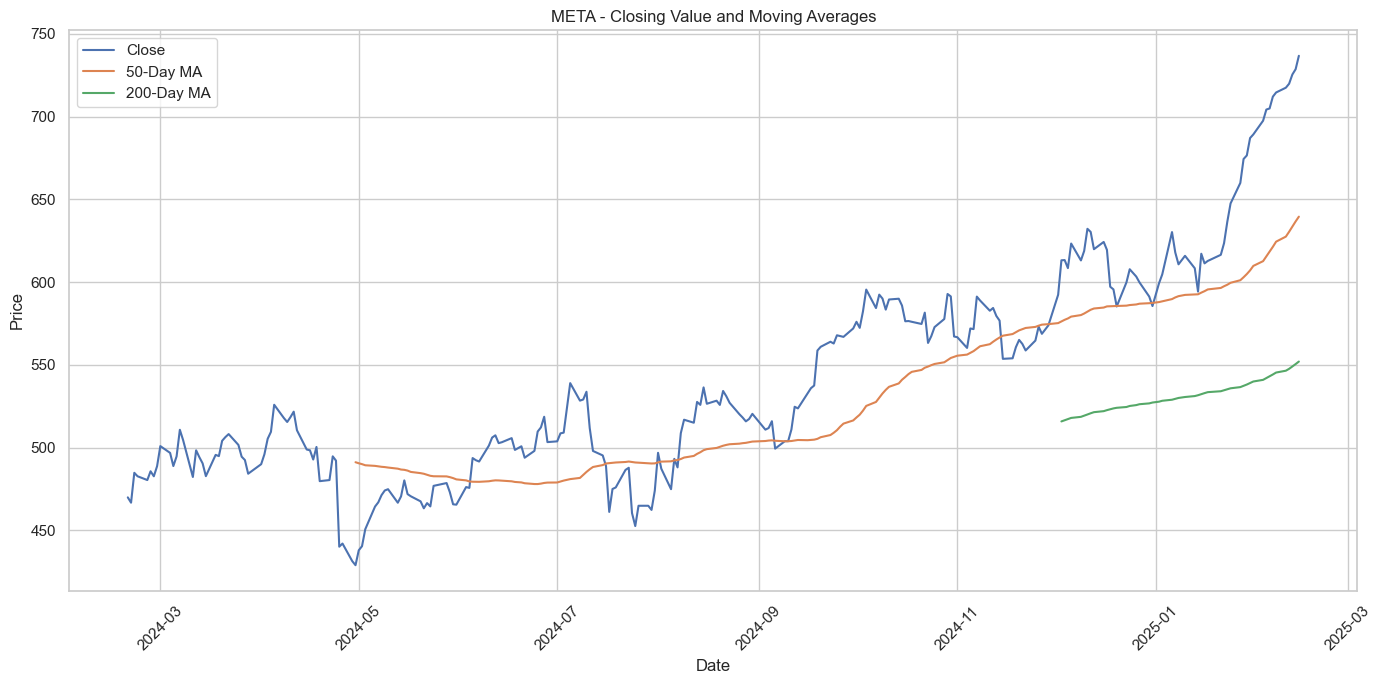

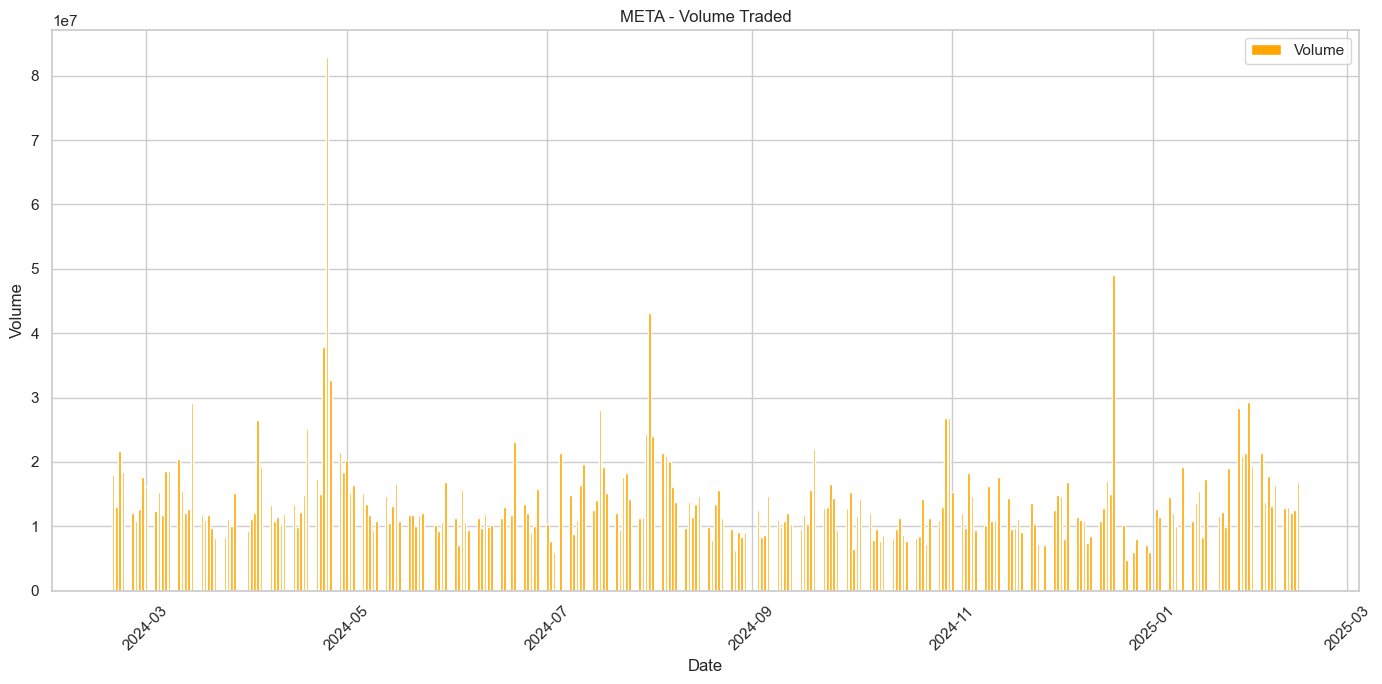

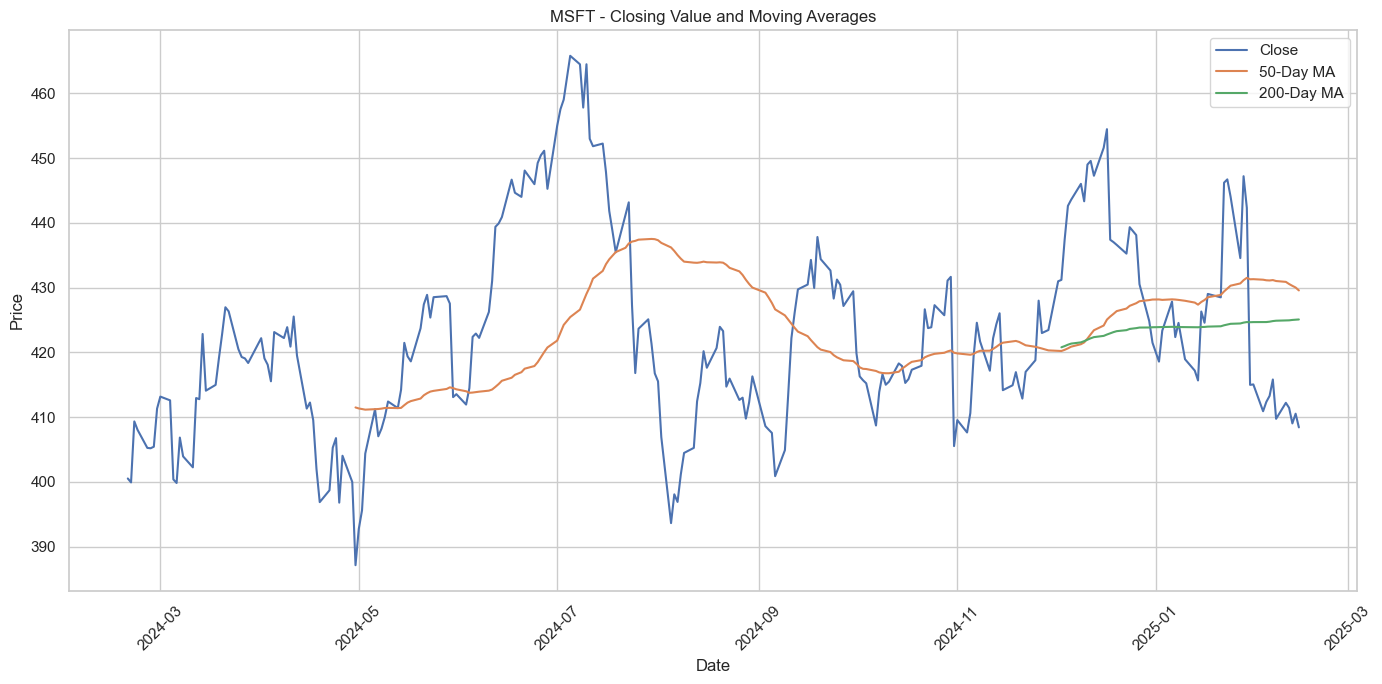

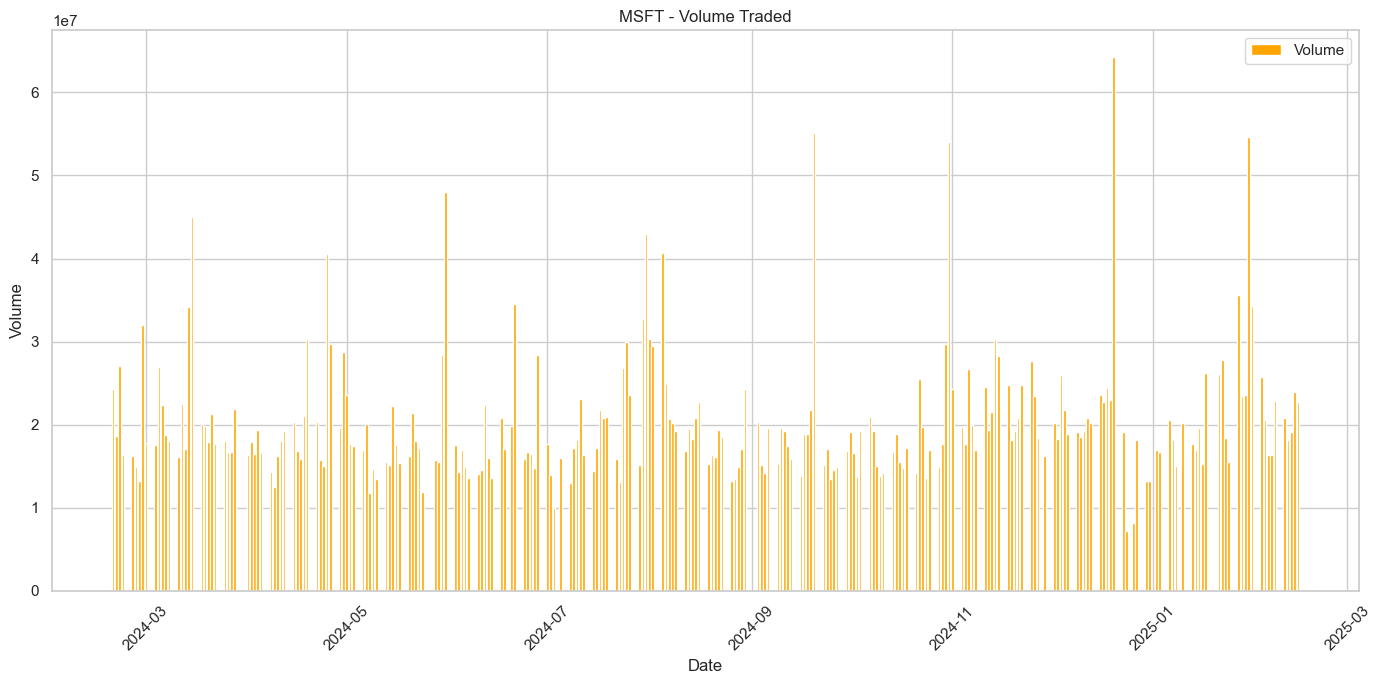

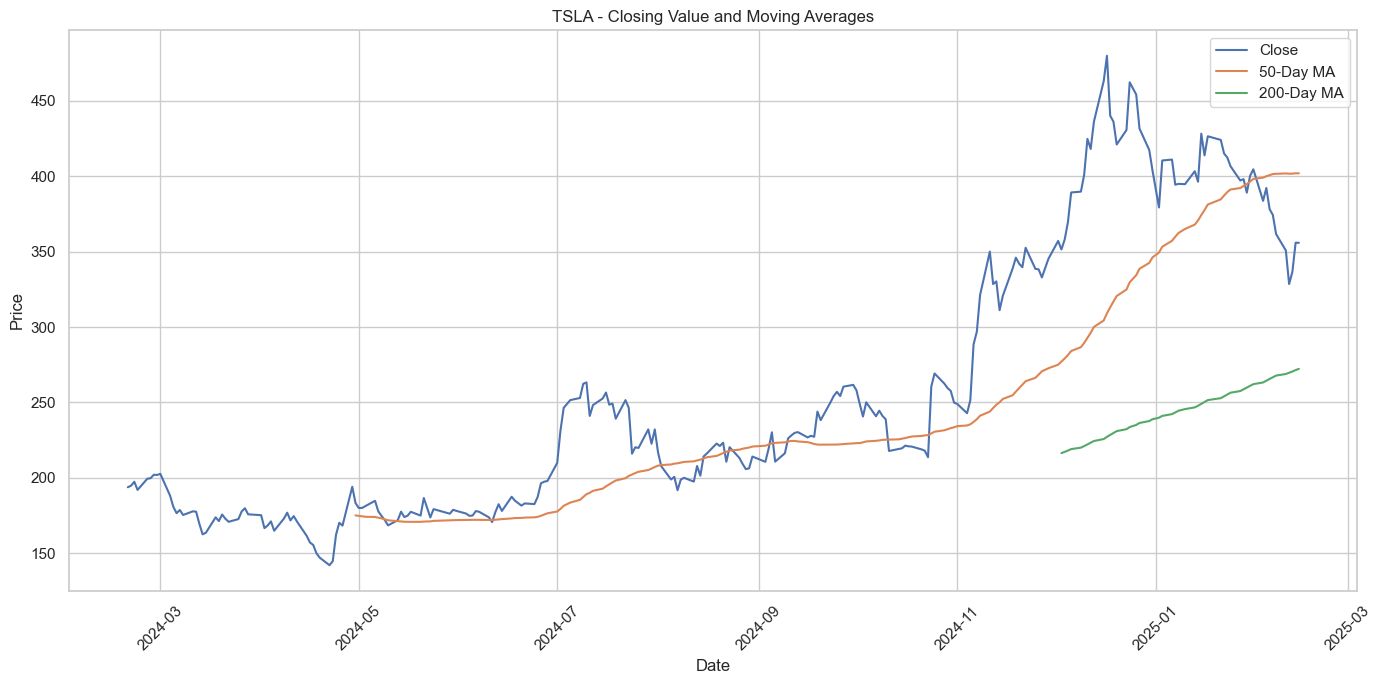

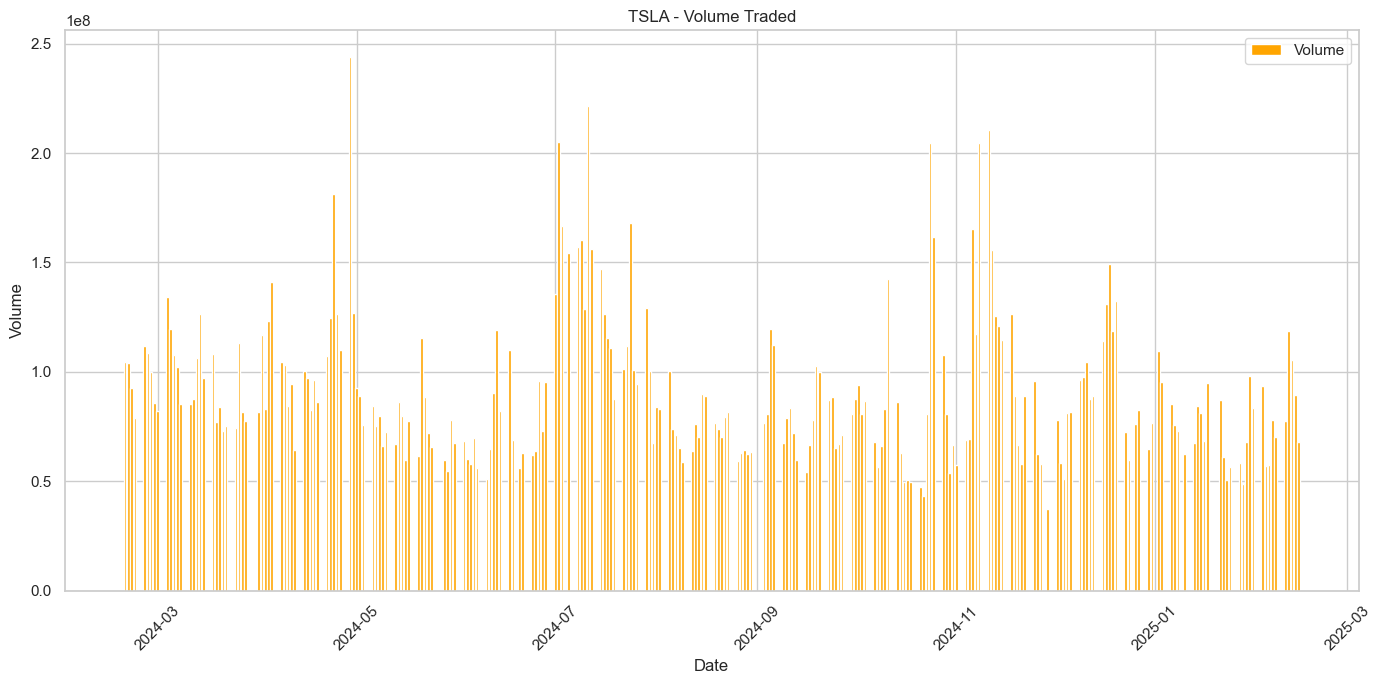

In [11]:
for ticker in unique_ticker:
    # Use .loc to avoid working with a slice and calculate moving averages for the current ticker
    stock_data.loc[stock_data['Ticker'] == ticker, '50_Days_MA'] = stock_data.loc[stock_data['Ticker'] == ticker, 'Close'].rolling(window=short_window).mean()
    stock_data.loc[stock_data['Ticker'] == ticker, '200_Days_MA'] = stock_data.loc[stock_data['Ticker'] == ticker, 'Close'].rolling(window=long_window).mean()

    # Filter the data for the current ticker
    ticker_data = stock_data[stock_data['Ticker'] == ticker]

    # Plot the closing price and moving averages for the current ticker
    plt.figure(figsize=(14, 7))
    plt.plot(ticker_data.index, ticker_data['Close'], label='Close')
    plt.plot(ticker_data.index, ticker_data['50_Days_MA'], label='50-Day MA')
    plt.plot(ticker_data.index, ticker_data['200_Days_MA'], label='200-Day MA')
    plt.title(f'{ticker} - Closing Value and Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Plot the trading volume for the current ticker
    plt.figure(figsize=(14, 7))
    plt.bar(ticker_data.index, ticker_data['Volume'], label='Volume', color='orange')
    plt.title(f'{ticker} - Volume Traded')
    plt.xlabel('Date')
    plt.ylabel('Volume')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


Microsoft's closing values remain stable with no significant change in its Moving Average. In contrast, Tesla and Meta experienced peaks in November 2024 and January 2025, with Meta reaching the highest closing value and projected to continue rising over the next 50 and 200 days. Meanwhile, Apple and Amazon exhibited fluctuating trends but showed noticeable spikes in their Moving Averages.

# Daily Returns From the Stocks

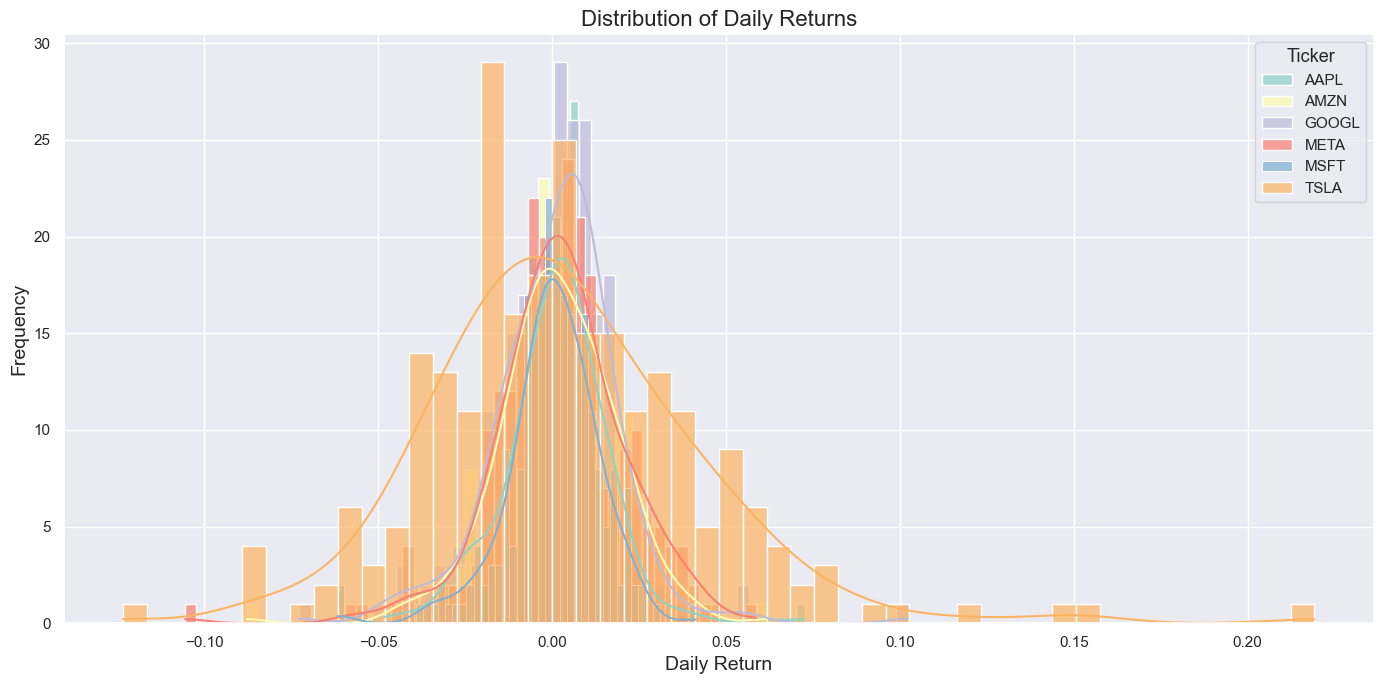

In [12]:
stock_data['Daily Return'] = stock_data.groupby('Ticker')['Close'].pct_change() 
#.pct_change() is used to calculate daily percentage return from a stock based on closing price

plt.figure(figsize=(14, 7))
sns.set(style='darkgrid')

# Define the Seaborn color palette and match the number of colors to the number of unique tickers
palette = sns.color_palette('Set3', len(unique_ticker))  # 'Set3' is a palette with distinct colors

for idx, ticker in enumerate(unique_ticker):
    ticker_data = stock_data[stock_data['Ticker'] == ticker]
    # Use color=palette[idx] to assign different colors to each ticker
    sns.histplot(ticker_data['Daily Return'].dropna(), bins=50, kde=True, label=ticker, alpha=0.7, color=palette[idx])

plt.title('Distribution of Daily Returns', fontsize=16)
plt.xlabel('Daily Return', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend(title='Ticker', title_fontsize='13', fontsize='11')

plt.tight_layout()
plt.show()

Normal Distribution with Skewness:

The daily returns of the stocks exhibit a roughly normal distribution, but with a slight right skew. This indicates that while most returns cluster around zero, there are occasional larger positive returns.

Tesla (TSLA) Shows Higher Volatility:

The orange-colored histogram (TSLA) has a wider spread and a more prominent tail compared to the others. This suggests that Tesla has higher volatility, meaning its stock experiences larger fluctuations in daily returns.

Other Stocks Exhibit More Stability:

Stocks like Microsoft (MSFT), Apple (AAPL), and Amazon (AMZN) have a narrower distribution, implying lower volatility and more stable returns compared to Tesla.

Meta (META) and Google (GOOGL) Have Some Large Returns:

The KDE (kernel density estimation) lines indicate that META and GOOGL have occasional higher returns, which may suggest periods of rapid growth or increased market activity.

# Check if there is any Correlation between Stocks

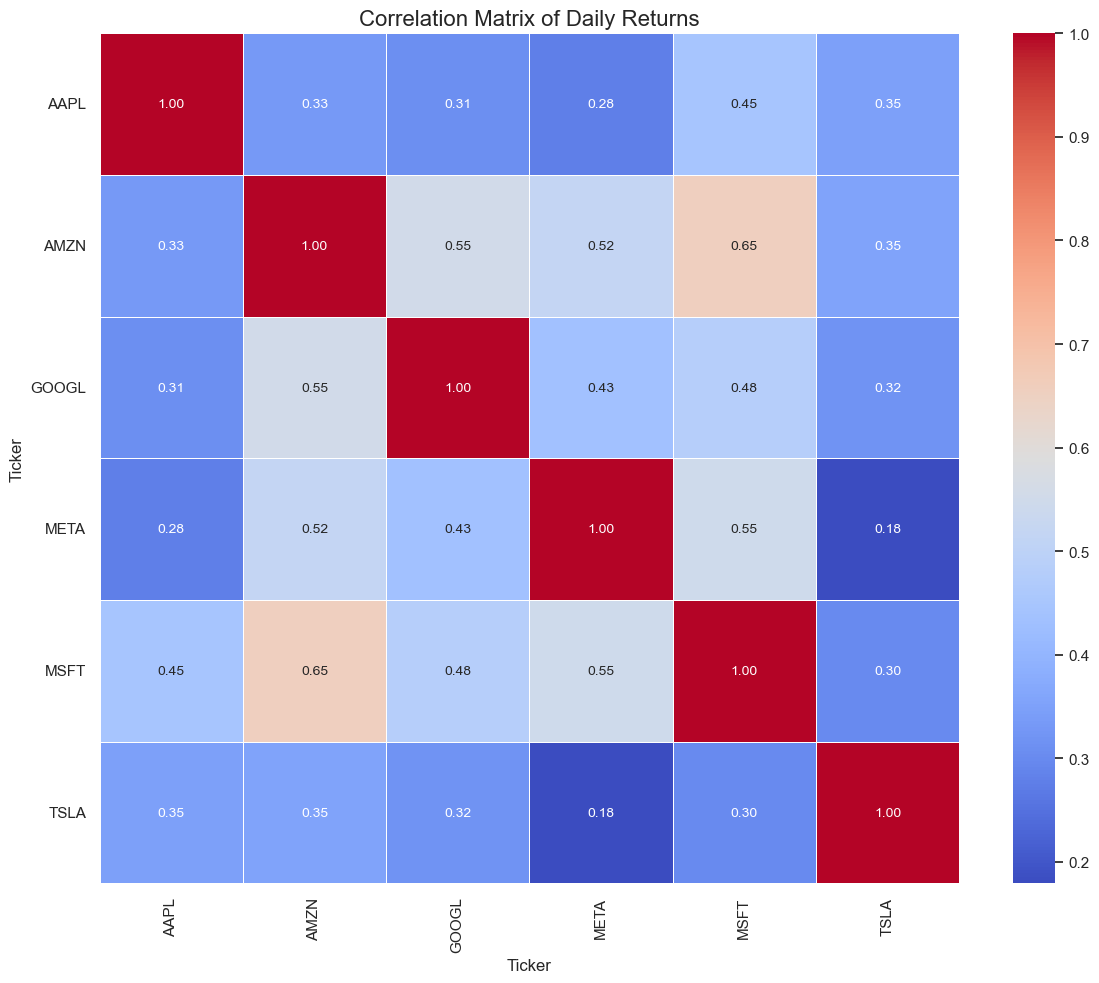

In [13]:
daily_returns = stock_data.pivot_table(index='Date', columns='Ticker', values='Daily Return')
correlation_matrix = daily_returns.corr()

plt.figure(figsize=(12, 10))
sns.set(style='whitegrid')

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5, fmt='.2f', annot_kws={"size": 10})
plt.title('Correlation Matrix of Daily Returns', fontsize=16)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Amazon (AMZN) and Microsoft (MSFT) Have the Highest Correlation (0.65): This suggests that AMZN and MSFT tend to move in similar directions on a daily basis, likely due to their strong positions in cloud computing and technology sectors.

Google (GOOGL) and Amazon (AMZN) Also Show a Strong Correlation (0.55): GOOGL and AMZN exhibit a moderate positive correlation, indicating that their stock movements are somewhat aligned, likely due to their presence in digital advertising, cloud computing, and e-commerce.

Tesla (TSLA) Has the Lowest Correlations with Other Stocks:TSLA's correlations with other stocks, especially META (0.18) and MSFT (0.30), are relatively weak. This indicates that Tesla's stock price moves more independently, reflecting its high volatility and industry-specific influences (EV market trends, regulatory changes, etc.).

Meta (META) Shows Moderate Correlations with Other Tech Stocks: META has a 0.55 correlation with MSFT and a 0.52 correlation with AMZN, suggesting it moves somewhat in sync with major tech firms but is also influenced by its own factors (social media trends, AI developments, etc.).

Apple (AAPL) Has Moderate Correlations Across the Board: AAPL’s highest correlation is with MSFT (0.45), showing that while it follows general tech trends, it also has unique movements, possibly due to its focus on hardware sales and consumer trends.

# Calculate the expected returns and volatility for each stocks

The main task is to have a efficient portfolio by balancing risk and return 

In [14]:
import numpy as np
# 252 - because the stock market is open for only those amount of days.
#Volatility - How much the price of the stock fluctuates over time 
#(High volatility → Large price swings (riskier asset).Low volatility → Small price swings (more stable asset).)

# Define the risk-free rate (adjust as needed)
risk_free_rate = 0.045  # Example: 4.5% (U.S. Treasury yield)

expected_returns = daily_returns.mean()*252
volatility_returns = daily_returns.std()*np.sqrt(252)

# Sharpe Ratio helps compare returns adjusted for risk
sharpe_ratio = (expected_returns - risk_free_rate) / volatility_returns


stock_stats = pd.DataFrame({
    'Expected Return': expected_returns,
    'Volatility (Risk)': volatility_returns,
    'Sharpe Ratio': sharpe_ratio
})

stock_stats

,Expected Return,Volatility (Risk),Sharpe Ratio
Ticker,,,
AAPL,0.336393,0.239946,1.214412
AMZN,0.356595,0.273651,1.138659
GOOGL,0.321487,0.288333,0.958917
META,0.503197,0.302664,1.513880
MSFT,0.042332,0.211697,-0.012601
TSLA,0.820512,0.644847,1.202630


Interpretation

MSFT Looks Like a Poor Risk-Reward Investment

Sharpe Ratio: -0.013 (negative = underperforming risk-free assets).
Low return (4.23%) despite 21.17% volatility → Not worth the risk.
META Has the Best Risk-Reward Profile

Sharpe Ratio: 1.51 (higher is better).
50.32% expected return for 30.27% risk → Efficient tradeoff.
AAPL & TSLA Have a Similar Risk-Reward Tradeoff

AAPL: 1.21, TSLA: 1.21 (both provide strong returns for their risk).
TSLA is the most volatile, meaning more extreme price swings.
AMZN & GOOGL Are Decent but Slightly Less Efficient

AMZN: 1.14 and GOOGL: 0.96 → Still good but slightly lower Sharpe Ratios.
GOOGL has the lowest Sharpe of the positive ones, meaning its returns don't justify its risk as well as others.

Investment Takeaways

✅ Best risk-adjusted return: META (1.51)
✅ Safe yet strong choices: AAPL (1.21), TSLA (1.21), AMZN (1.14)
❌ MSFT is underperforming risk-free assets—consider replacing it.
⚠️ TSLA has high risk but offers high returns—great for aggressive investors.